<a href="https://colab.research.google.com/github/imabelaus/DP_Coursework1/blob/master/First_hyp_Data_overview_Latam_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/Latam_imputed - LATAM_imputed (1).csv')

In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887


In [0]:
df.shape

(130, 25)

In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887


In [0]:
df.describe()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2.823077,635.838462,0.327223,0.631700,0.976625,1.0,2013.500000,2.599301,4.116651,4.204147,3.306270,3.907070,4.456878,4.445115,38.560820,4.087213,4.202607,2.883262,5.355232,26.343975,103.083540,3.904607,4.593792,6.711277
std,6.875939,421.899632,0.376807,0.147588,1.147163,0.0,2.883393,0.418298,0.678130,0.507219,0.447408,1.410570,0.643354,0.747817,14.761993,0.661554,0.556989,0.598818,0.648497,22.439168,29.480701,1.132258,0.858048,2.836707
min,0.000000,5.000000,0.008000,0.528000,0.016896,1.0,2009.000000,1.745999,2.713680,2.922948,2.104724,1.537637,2.690154,2.477433,4.126460,2.713680,2.794357,1.672877,3.633823,-7.627568,30.748390,1.279274,2.578139,2.007000
25%,0.000000,165.000000,0.008000,0.528000,0.016896,1.0,2011.000000,2.317200,3.655765,3.864539,3.075418,3.250343,4.001116,3.821616,30.099989,3.638406,3.848359,2.443369,5.028243,8.777988,86.200676,3.103933,3.999354,4.144250
50%,0.000000,1000.000000,0.008000,0.528000,0.016896,1.0,2013.500000,2.549380,4.035947,4.122560,3.325806,3.609919,4.431432,4.420288,36.760434,4.004216,4.109007,2.787927,5.446974,21.912254,98.421404,3.901867,4.755224,6.945000
75%,2.000000,1000.000000,0.667000,0.730000,2.275313,1.0,2016.000000,2.878356,4.441073,4.562907,3.494991,4.120757,4.855955,5.112414,49.236776,4.357408,4.550128,3.304398,5.768103,37.225844,124.155807,4.618444,5.138615,8.335000
max,41.000000,1000.000000,0.992000,0.992000,3.168712,1.0,2018.000000,3.744064,5.865252,5.516477,4.399918,10.077030,6.049107,6.095396,72.350000,5.865252,5.646328,4.475000,6.514449,90.236846,182.898863,6.533621,6.487304,12.827000


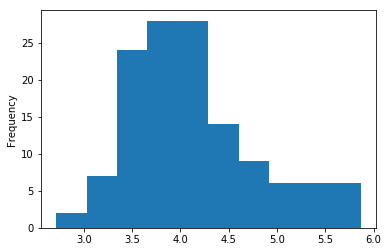

In [0]:
df['oneB'].plot(kind='hist',bins = 10, figsize = (6,4))

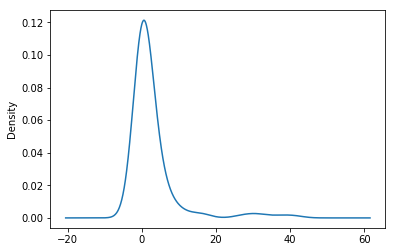

In [0]:
df['Countries_fintechs'].plot(kind='kde')

In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887


In [0]:

df['oneA_wv'] = df.oneA*.7
df['oneB_wv'] = df.oneB*.15
df['oneC_wv'] = df.oneC*.15
df['Master_one'] = df.oneA_wv + df.oneB_wv + df.oneC_wv

In [0]:
max_twoA = df['twoA'].max()
max_twoB = df['twoB'].max()
max_twoC = df['twoC'].max()
max_twoD = df['twoD'].max()
max_twoE = df['twoE'].max()


df['twoA_wv'] = (df.twoA/max_twoA)*.1
df['twoB_wv'] = (df.twoB/max_twoB)*.1
df['twoC_wv'] = (df.twoC/max_twoC)*.1
df['twoD_wv'] = (df.twoD/max_twoD)*.1
df['twoE_wv'] = (df.twoE/max_twoE)*.6

df['Master_two'] = df.twoA_wv + df.twoB_wv + df.twoC_wv + df.twoD_wv + df.twoE_wv

In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217,1.713292,0.420768,0.609196,2.743256,0.077974,0.041636,0.389842,0.075680,0.079213,0.664346
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193,1.721511,0.495359,0.684942,2.901812,0.073604,0.042638,0.405679,0.075450,0.068170,0.665541
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659,2.452997,0.615211,0.582478,3.650687,0.088307,0.032386,0.396461,0.080763,0.082291,0.680209
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740,2.020360,0.552015,0.596372,3.168746,0.088143,0.040896,0.370529,0.084300,0.086152,0.670020
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887,2.206737,0.538431,0.683521,3.428688,0.082418,0.040943,0.401113,0.080514,0.049238,0.654227


In [0]:



df['threeA_wv'] = df.threeA*.05
df['threeB_wv'] = df.threeB*.05
df['threeC_wv'] = df.threeC*.05
df['threeD_wv'] = df.threeD*.85
df['Master_three'] = df.threeA_wv + df.threeB_wv + df.threeC_wv + df.threeD_wv

In [0]:
df['Master_six'] = df.sixA

In [0]:
max_fourA = df['fourA'].max()
max_fourB = df['fourB'].max()


df['fourA_wv'] = (df.fourA/max_fourA)*.2
df['fourB_wv'] = (df.fourB/max_fourB)*.8
df['Master_four']= df.fourA_wv + df.fourB_wv


In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two,threeA_wv,threeB_wv,threeC_wv,threeD_wv,Master_three,Master_six,fourA_wv,fourB_wv,Master_four
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217,1.713292,0.420768,0.609196,2.743256,0.077974,0.041636,0.389842,0.075680,0.079213,0.664346,0.140256,0.204270,0.156871,3.959118,4.460515,7.217,0.172990,0.611549,0.784539
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193,1.721511,0.495359,0.684942,2.901812,0.073604,0.042638,0.405679,0.075450,0.068170,0.665541,0.165120,0.234588,0.135196,4.869748,5.404651,7.193,0.200000,0.494247,0.694247
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659,2.452997,0.615211,0.582478,3.650687,0.088307,0.032386,0.396461,0.080763,0.082291,0.680209,0.205070,0.282316,0.168524,5.383777,6.039687,6.659,0.195591,0.557525,0.753116
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740,2.020360,0.552015,0.596372,3.168746,0.088143,0.040896,0.370529,0.084300,0.086152,0.670020,0.184005,0.239246,0.180687,4.742293,5.346231,9.740,0.108160,0.554684,0.662844
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887,2.206737,0.538431,0.683521,3.428688,0.082418,0.040943,0.401113,0.080514,0.049238,0.654227,0.179477,0.248665,0.156594,4.694831,5.279568,4.887,0.140993,0.387158,0.528151


In [0]:
df['Master_four'].describe()

count    130.000000
mean       0.509276
std        0.157487
min        0.117588
25%        0.425249
50%        0.468754
75%        0.629503
max        0.872994
Name: Master_four, dtype: float64

In [0]:
max_fiveA = df['fiveA'].max()
max_fiveB = df['fiveB'].max()



df['fiveA_wv'] = (df.fiveA/max_fiveA)*.85
df['fiveB_wv'] = (df.fiveB/max_fiveB)*.15
df['Master_five']= df.fiveA_wv + df.fiveB_wv

In [0]:
df['Master_five'].describe()

count    130.000000
mean       0.614193
std        0.165994
min        0.229193
25%        0.493677
50%        0.622962
75%        0.713820
max        1.000000
Name: Master_five, dtype: float64

In [0]:
df.head()

,Countries_fintechs,CB_Ranking,Fintechs_decile,CB_decile,Master_Target,Country,Latam,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two,threeA_wv,threeB_wv,threeC_wv,threeD_wv,Master_three,Master_six,fourA_wv,fourB_wv,Master_four,fiveA_wv,fiveB_wv,Master_five
0,4,229,0.797,0.642,2.046696,Argentina,1,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217,1.713292,0.420768,0.609196,2.743256,0.077974,0.041636,0.389842,0.075680,0.079213,0.664346,0.140256,0.204270,0.156871,3.959118,4.460515,7.217,0.172990,0.611549,0.784539,0.439368,0.119558,0.558926
1,32,300,0.976,0.593,2.315072,Brazil,1,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193,1.721511,0.495359,0.684942,2.901812,0.073604,0.042638,0.405679,0.075450,0.068170,0.665541,0.165120,0.234588,0.135196,4.869748,5.404651,7.193,0.200000,0.494247,0.694247,0.492101,0.120143,0.612244
2,1,424,0.537,0.561,1.205028,Chile,1,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659,2.452997,0.615211,0.582478,3.650687,0.088307,0.032386,0.396461,0.080763,0.082291,0.680209,0.205070,0.282316,0.168524,5.383777,6.039687,6.659,0.195591,0.557525,0.753116,0.457756,0.116111,0.573867
3,7,175,0.894,0.715,2.556840,Colombia,1,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740,2.020360,0.552015,0.596372,3.168746,0.088143,0.040896,0.370529,0.084300,0.086152,0.670020,0.184005,0.239246,0.180687,4.742293,5.346231,9.740,0.108160,0.554684,0.662844,0.455800,0.117037,0.572837
4,6,176,0.862,0.699,2.410152,Mexico,1,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887,2.206737,0.538431,0.683521,3.428688,0.082418,0.040943,0.401113,0.080514,0.049238,0.654227,0.179477,0.248665,0.156594,4.694831,5.279568,4.887,0.140993,0.387158,0.528151,0.452814,0.123267,0.576080


In [0]:
df_weights = df.loc[:,('Master_Target','Master_one','Master_two', 'Master_three', 'Master_four','Master_five','Master_six')]

In [0]:
df_weights.head()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
0,2.046696,2.743256,0.664346,4.460515,0.784539,0.558926,7.217
1,2.315072,2.901812,0.665541,5.404651,0.694247,0.612244,7.193
2,1.205028,3.650687,0.680209,6.039687,0.753116,0.573867,6.659
3,2.556840,3.168746,0.670020,5.346231,0.662844,0.572837,9.740
4,2.410152,3.428688,0.654227,5.279568,0.528151,0.576080,4.887


In [0]:
df_weights.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.976625,3.067631,0.682209,5.110602,0.509276,0.614193,6.711277
std,1.147163,0.407053,0.095632,0.609231,0.157487,0.165994,2.836707
min,0.016896,2.129635,0.411972,3.494679,0.117588,0.229193,2.007000
25%,0.016896,2.760092,0.623572,4.793445,0.425249,0.493677,4.144250
50%,0.016896,3.041995,0.671858,5.183628,0.468754,0.622962,6.945000
75%,2.275313,3.333982,0.738033,5.483291,0.629503,0.713820,8.335000
max,3.168712,4.042273,0.882727,6.276390,0.872994,1.000000,12.827000


In [0]:
df_weights.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.976625,3.067631,0.682209,5.110602,0.509276,0.614193,6.711277
std,1.147163,0.407053,0.095632,0.609231,0.157487,0.165994,2.836707
min,0.016896,2.129635,0.411972,3.494679,0.117588,0.229193,2.007000
25%,0.016896,2.760092,0.623572,4.793445,0.425249,0.493677,4.144250
50%,0.016896,3.041995,0.671858,5.183628,0.468754,0.622962,6.945000
75%,2.275313,3.333982,0.738033,5.483291,0.629503,0.713820,8.335000
max,3.168712,4.042273,0.882727,6.276390,0.872994,1.000000,12.827000


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [0]:
df_processed = preprocessing.StandardScaler().fit_transform(df_weights)

In [0]:
df_processed.head()

AttributeError: ignored

In [0]:
df_processed = pd.DataFrame(df_processed)

In [0]:
df_processed.columns = ['Master_Target', 'Master_one','Master_two','Master_three','Master_four','Master_five','Master_six']

In [0]:
df_processed.head()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
0,0.936406,-0.799967,-0.187515,-1.071189,1.754609,-0.334233,0.178968
1,1.171259,-0.408939,-0.174970,0.484524,1.179062,-0.011785,0.170475
2,0.199873,1.437926,-0.020997,1.530914,1.554309,-0.243874,-0.018500
3,1.382827,0.249370,-0.127955,0.388262,0.978888,-0.250107,1.071820
4,1.254463,0.890436,-0.293738,0.278417,0.120313,-0.230490,-0.645584


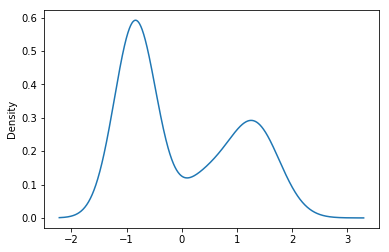

In [0]:
df_processed['Master_Target'].plot(kind='kde')

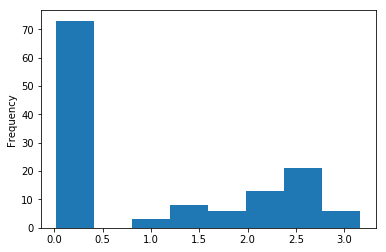

In [0]:
df['Master_Target'].plot(kind='hist',bins = 8, figsize = (6,4))

In [0]:
df_processed.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,5.294910e-17,2.880175e-16,-2.562053e-16,-7.540976e-16,-1.554312e-16,-7.596488e-16,-2.792638e-16
std,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00
min,-8.398477e-01,-2.313274e+00,-2.836738e+00,-2.662659e+00,-2.496741e+00,-2.328331e+00,-1.664774e+00
25%,-8.398477e-01,-7.584479e-01,-6.155275e-01,-5.225995e-01,-5.356165e-01,-7.288322e-01,-9.084328e-01
50%,-8.398477e-01,-6.322221e-02,-1.086594e-01,1.203311e-01,-2.583015e-01,5.303163e-02,8.271111e-02
75%,1.136466e+00,6.568727e-01,5.860006e-01,6.141048e-01,7.663611e-01,6.025038e-01,5.746115e-01
max,1.918269e+00,2.403651e+00,2.104887e+00,1.920944e+00,2.318449e+00,2.333210e+00,2.164264e+00


In [0]:
normalizer = preprocessing.Normalizer().fit(df_processed)  # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [0]:
normalizer = normalizer.transform(df_processed) 

In [0]:
df_normalized = pd.DataFrame(normalizer)

In [0]:
df_normalized.columns = ['Master_Target', 'Master_one','Master_two','Master_three','Master_four','Master_five','Master_six']

In [0]:
df_normalized.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,-0.024455,-0.012779,-0.015403,-0.006703,-0.013165,-0.006263,-0.014799
std,0.443610,0.355034,0.356775,0.365946,0.356899,0.363020,0.403808
min,-0.833976,-0.707899,-0.708827,-0.772367,-0.659865,-0.727285,-0.763423
25%,-0.381084,-0.263427,-0.277221,-0.261839,-0.269088,-0.242225,-0.370242
50%,-0.242583,-0.032275,-0.050160,0.050909,-0.117549,0.014519,0.025031
75%,0.414759,0.271353,0.236364,0.262070,0.247888,0.265398,0.243196
max,0.890645,0.699971,0.755580,0.581655,0.770594,0.645470,0.931286


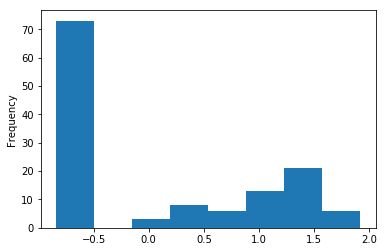

In [0]:
df_processed['Master_Target'].plot(kind='hist',bins = 8, figsize = (6,4))

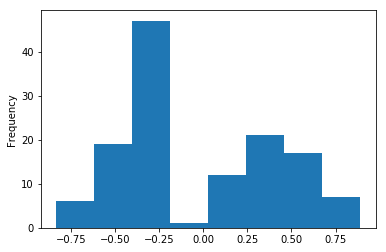

In [0]:
df_normalized['Master_Target'].plot(kind='hist',bins = 8, figsize = (6,4))

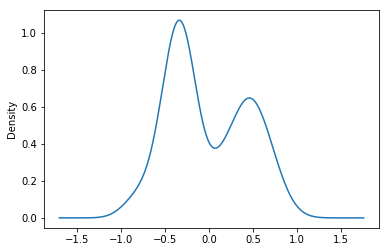

In [0]:
df_normalized['Master_Target'].plot(kind='kde')

This is a correlation teste

In [0]:
df_normalized.corr(method ='pearson') 

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
Master_Target,1.000000,0.215843,0.431304,0.359351,0.383174,0.509423,0.106377
Master_one,0.215843,1.000000,0.386681,0.662622,-0.048118,0.124221,-0.014651
Master_two,0.431304,0.386681,1.000000,0.440742,0.467604,0.313826,0.153095
Master_three,0.359351,0.662622,0.440742,1.000000,0.067570,0.116716,0.051079
Master_four,0.383174,-0.048118,0.467604,0.067570,1.000000,0.051741,0.088565
Master_five,0.509423,0.124221,0.313826,0.116716,0.051741,1.000000,-0.006851
Master_six,0.106377,-0.014651,0.153095,0.051079,0.088565,-0.006851,1.000000


In [0]:

from scipy.stats import pearsonr
target_col, hyp_1 =  df_normalized['Master_Target'], df_normalized['Master_one']
corr, p = pearsonr(target_col, hyp_1)
h1p = p
h1p

0.013649375512200086

In [0]:
target_col, hyp_2 =  df_normalized['Master_Target'], df_normalized['Master_two']
corr, p = pearsonr(target_col, hyp_2)
h2p = p
h2p

3.0082661727792637e-07

In [0]:
target_col, hyp_3 =  df_normalized['Master_Target'], df_normalized['Master_three']
corr, p = pearsonr(target_col, hyp_3)
h3p = p
h3p

2.6833653524601116e-05

In [0]:
target_col, hyp_4 =  df_normalized['Master_Target'], df_normalized['Master_four']
corr, p = pearsonr(target_col, hyp_4)
h4p = p
h4p

6.807286556366098e-06

In [0]:
target_col, hyp_5 =  df_normalized['Master_Target'], df_normalized['Master_five']
corr, p = pearsonr(target_col, hyp_5)
h5p = p
h5p

6.032682940493941e-10

In [0]:
target_col, hyp_6 =  df_normalized['Master_Target'], df_normalized['Master_six']
corr, p = pearsonr(target_col, hyp_6)
h6p = p
h6p

0.22835972790643308

In [0]:
df = pd.read_csv('/content/Mastersheet_part3 - Sheet1.csv')

In [0]:
df.head()

,Date,Quarter,B2B,B2C,Mean CB rank,CB rank percentile,Mean CB rank_B2B,Mean CB rank_B2C,Sum of both,First Half,Second half,Difference,Decile_sum_of both,Decile_B2B,Decile_B2C
0,2000-03-31,2000 Q1,3,6,"390,421",0.333,158,239,9,1,0,-3,0.250,0.250,0.250
1,2000-06-30,2000 Q2,1,1,567675,0.250,567,567,2,1,0,0,0.200,0.200,0.200
2,2000-09-30,2000 Q3,0,0,316495.9863,0.833,312,289,0,1,0,0,0.167,0.167,0.167
3,2000-12-31,2000 Q4,0,0,316495.9863,0.000,312,289,0,1,0,0,0.143,0.143,0.143
4,2001-03-31,2001 Q1,1,2,"552,223",0.286,440,422,3,1,0,-1,0.500,0.375,0.500
